# Imports and file loading

In [1]:
import sys
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/lib/oi/')
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/lib/rp/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.animation as animation
%matplotlib inline
from scipy.ndimage.interpolation import rotate
from math import cos, sin
import time
import random
import string
import optical_imaging as oi
import copy
import oi_file
from scipy.ndimage.filters import gaussian_filter
import resistive_pulse as rp
import os
pi=3.14159
import cv2

# Jupyter
from IPython.display import HTML

In [2]:
#file_directory = '/home/prestonh/Desktop/Research/cancer_cells/data/xfer/'
file_directory = '/home/prestonh/Desktop/Research/cancer_cells/data/4-28-2017/PDMS_oil_0/20-50-20_0/oi/bin/'
#file_directory = '/home/prestonh/Desktop/Research/cancer_cells/data/2-24-2017/17p5_30_17p5_4/oi/bin/'
file_name = 'test_camera_2'
file_path = file_directory + file_name
output_file_path = file_path + '_events.json'
vid = oi_file.Raw(file_path, 512, 288, 50000, 5)
#vid = oi_file.Raw(file_path, 640, 480, 50000, 5)

# Optimize alpha, beta

### Get frame with cluster

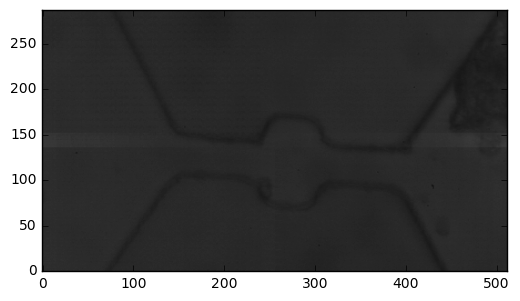

In [3]:
template_index = 1000
template_frame = vid.get_frame(template_index)
plt.imshow(template_frame, cmap = 'gray', origin = 'lower', vmin = 0, vmax = 1)
plt.show()

In [4]:
threshold_difference = 0.02

print vid._total_frames

num_found = 0
for i in range(0, vid._total_frames):
    if i%1000 == 0:
        print i
    frame = vid.get_frame(i)
    clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference)
    if(len(clusters)) > 0:
        print i
        num_found+=1
        if num_found > 5:
            #break
            pass
            

49974
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
62
63
64
65
66
67
68
69
70
72
73
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
118
119
122
130
131
132
133
134
136
137
140
141
142
143
144
145
146
147
148
149
150
154
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
534
535
536
538
539
540
541
542
543
776
777
782
788
792
794
797
807


KeyboardInterrupt: 

### Show image, template image, difference

1


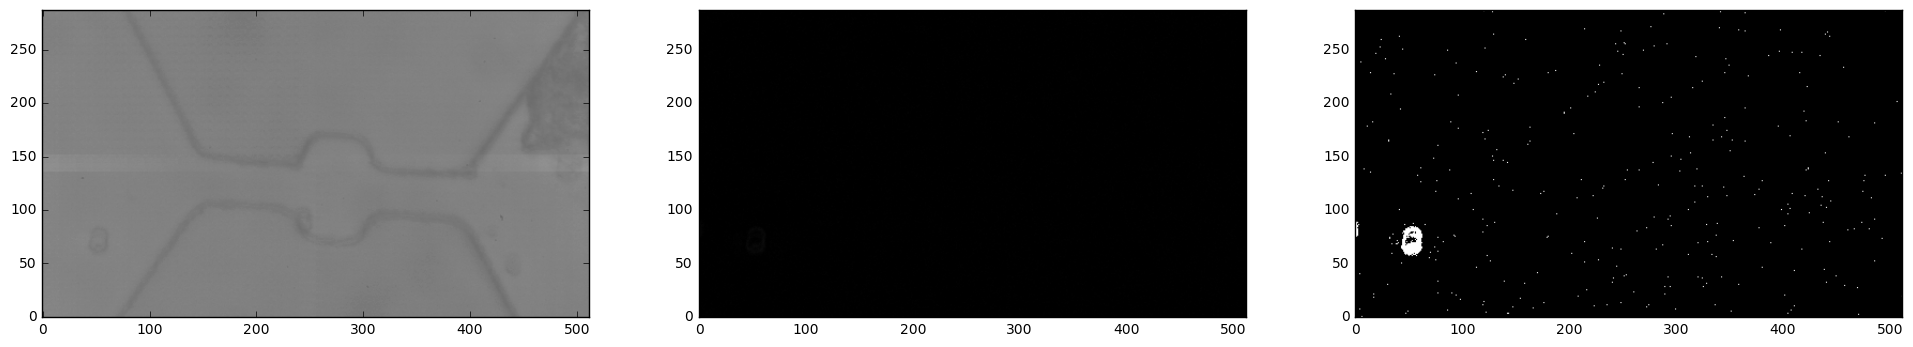

In [12]:
index = 275
template_frame = vid.get_frame(template_index)
frame = vid.get_frame(index)

threshold_difference = .015#.035
alpha = 1#2



beta = 'avg'    # -(np.mean(frame)-.5)
template_frame = oi.change_frame_contrast(template_frame, alpha = alpha, beta = beta)
frame = oi.change_frame_contrast(frame, alpha = alpha, beta = beta)


cluster_threshold = 200


neg_frame = abs(frame - template_frame)
clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold)
temp_neg_frame = copy.deepcopy(neg_frame[:,:])
temp_neg_frame[temp_neg_frame > threshold_difference] = 1
temp_neg_frame[temp_neg_frame <= threshold_difference] = 0

print len(clusters)
fig, axes = plt.subplots(1,3,figsize=(24,8))

# Raw image
plt.sca(axes[0])
plt.imshow(frame, cmap = 'gray', vmin = 0, vmax = 1, origin = 'lower')

# Negative
plt.sca(axes[1])
plt.imshow(neg_frame, cmap = 'gray', vmin = 0, vmax = 1, origin = 'lower')

# Thresholded negative
plt.sca(axes[2])
plt.imshow(temp_neg_frame, vmin = 0, vmax = 1, cmap = 'gray', origin = 'lower')

plt.show()

# Find events

In [13]:
reload(oi)
alpha = 1
beta = 'avg'
raw_events = oi.find_events(vid, ti = 0, template_frame = vid.get_frame(template_index), threshold_difference = threshold_difference, cluster_threshold = cluster_threshold, alpha = alpha, beta = 'avg')

/home/prestonh/Desktop/Research/pore_stats/lib/oi/optical_imaging.py:1026: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template_frame == None:
/home/prestonh/Desktop/Research/pore_stats/lib/oi/optical_imaging.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


t:  0 / 49974 	clusters: 1 	active: 0 	inactive: 0
t:  1000 / 49974 	clusters: 0 	active: 0 	inactive: 4
t:  2000 / 49974 	clusters: 0 	active: 0 	inactive: 6
t:  3000 / 49974 	clusters: 0 	active: 0 	inactive: 6
t:  4000 / 49974 	clusters: 0 	active: 0 	inactive: 7
t:  5000 / 49974 	clusters: 0 	active: 0 	inactive: 9
t:  6000 / 49974 	clusters: 0 	active: 0 	inactive: 10
t:  7000 / 49974 	clusters: 0 	active: 0 	inactive: 10
t:  8000 / 49974 	clusters: 0 	active: 0 	inactive: 12
t:  9000 / 49974 	clusters: 0 	active: 0 	inactive: 13
t:  10000 / 49974 	clusters: 0 	active: 0 	inactive: 16
t:  11000 / 49974 	clusters: 0 	active: 0 	inactive: 19
t:  12000 / 49974 	clusters: 1 	active: 1 	inactive: 19
t:  13000 / 49974 	clusters: 0 	active: 0 	inactive: 21
t:  14000 / 49974 	clusters: 0 	active: 0 	inactive: 22
t:  15000 / 49974 	clusters: 0 	active: 0 	inactive: 22
t:  16000 / 49974 	clusters: 0 	active: 0 	inactive: 24
t:  17000 / 49974 	clusters: 0 	active: 0 	inactive: 26
t:  18000 /

### Inspection

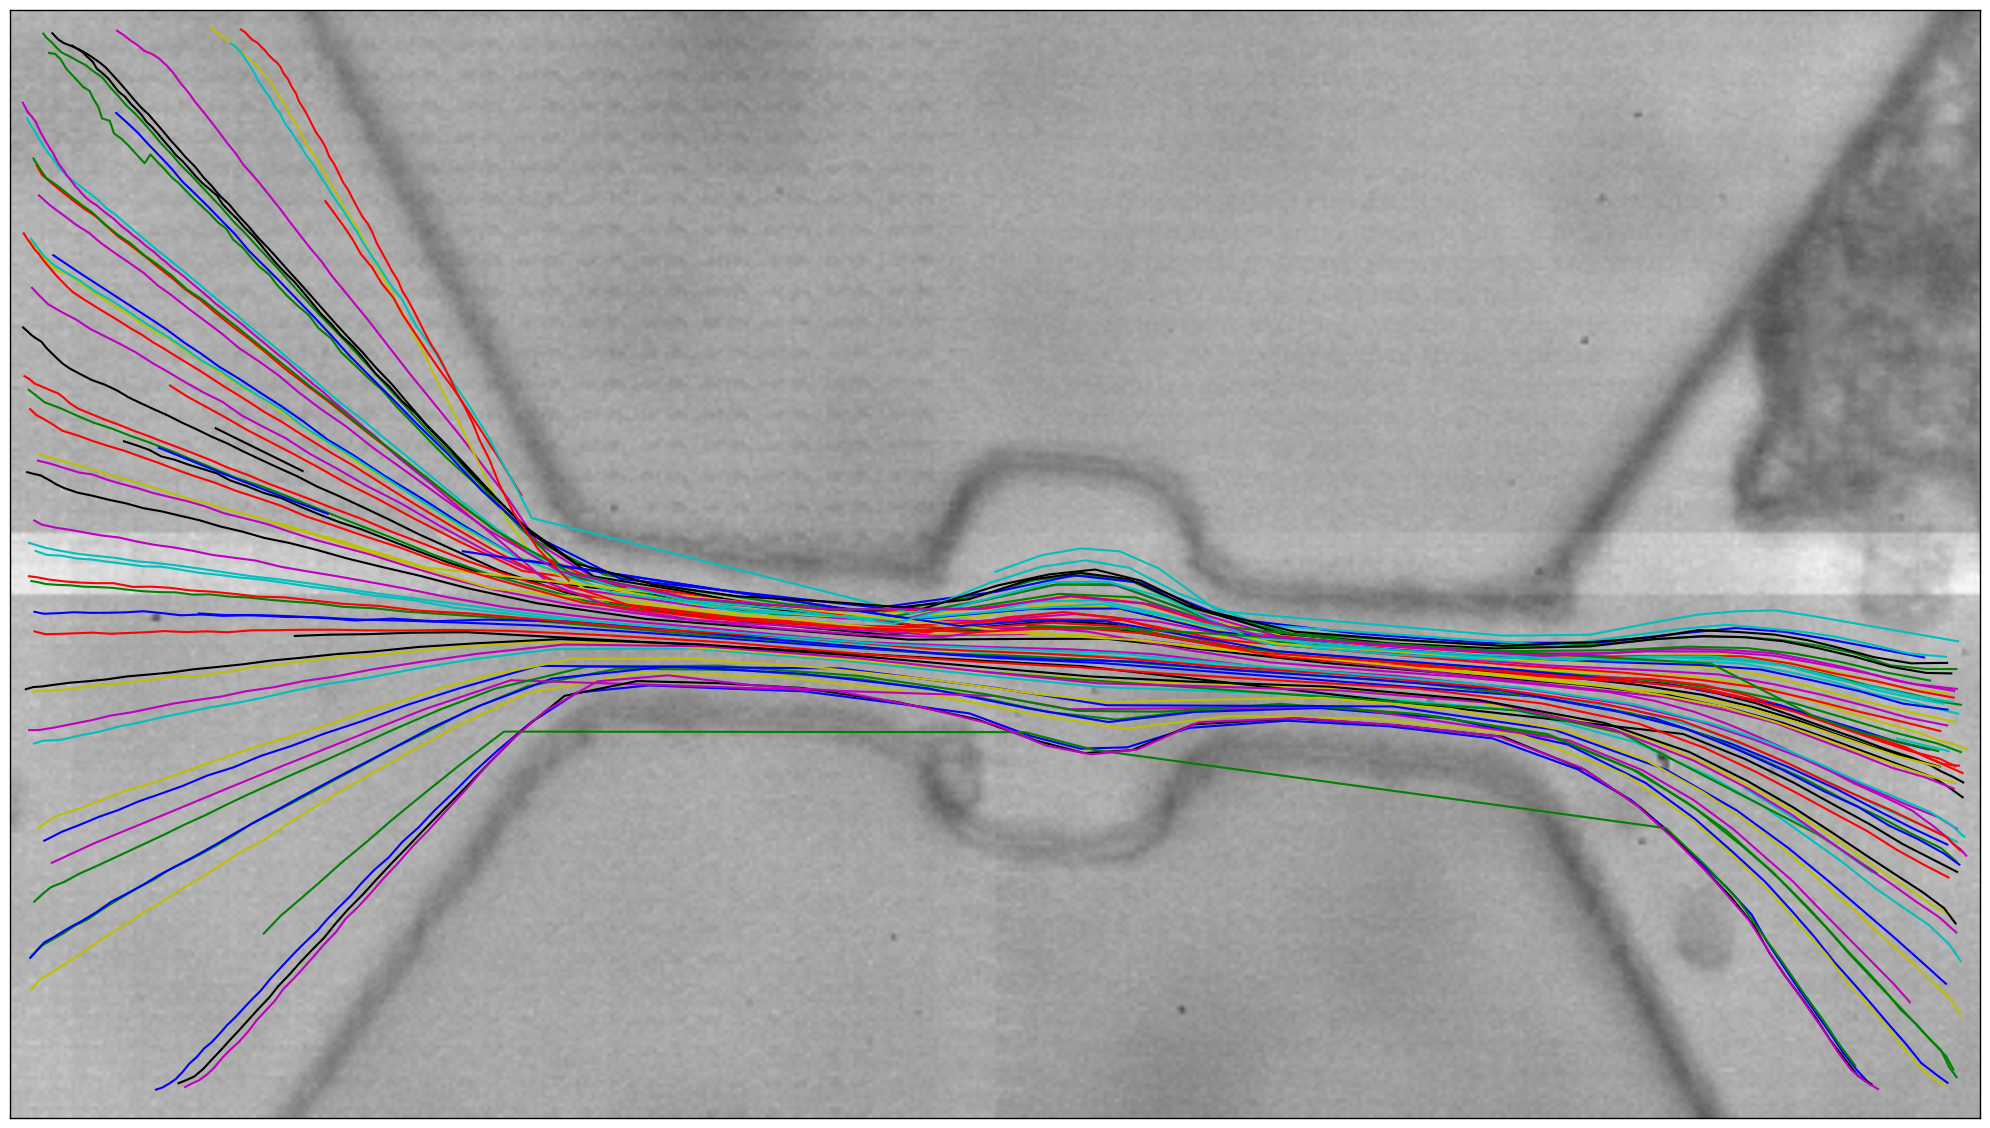

In [14]:
fig = plt.figure(figsize = (20,12))

#colors = cm.rainbow()

#gs = gs.GridSpec(2, 2)

for i, event in enumerate(raw_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 1.5)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()

#plt.savefig('/home/preston/Desktop/Science/Research/cancer_cells/10-5-2016_10um_0_10000fps.png', dpi = 300)

plt.show()

##### Save events

In [15]:
print output_file_path

/home/prestonh/Desktop/Research/cancer_cells/data/4-28-2017/PDMS_oil_0/20-50-20_0/oi/bin/test_camera_2_events.json


In [16]:
oi_file.save_oi_events_json(output_file_path, raw_events)

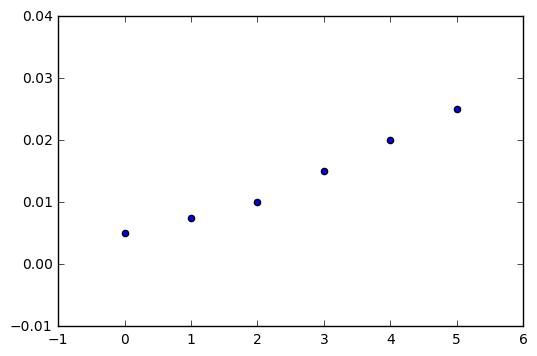

In [19]:
plt.scatter([i for i in range(6)],[0.005,0.0075,0.01,0.015,0.02,0.025])
plt.show()